In [21]:
using LimeSuite

# Read device information
dev_list = Array{LimeSuite.lms_info_str_t}(undef,1)
num_dev = LimeSuite.LMS_GetDeviceList(dev_list)
println(String(collect(dev_list[1])))

device = Ref{Ptr{Cvoid}}()
args = C_NULL
LimeSuite.LMS_Open(device, dev_list[1], args)

LimeSuite.LMS_Init(device[])

rx_channel = UInt64(0)
LimeSuite.LMS_EnableChannel(device[], LimeSuite.LMS_CH_RX, rx_channel, true)

fc = Float64(1835e6) # Center frequency = Rakuten Mobile B3
LimeSuite.LMS_SetLOFrequency(device[], LimeSuite.LMS_CH_RX, rx_channel, fc)

sampling_rate = Float64(30.72e6) # LTE 20 MHz bandwidth
oversampling_ratio = UInt64(1) # no oversampling
LimeSuite.LMS_SetSampleRate(device[], sampling_rate, oversampling_ratio)

LimeSDR Mini, media=USB 3.0, module=FT601, addr=24607:1027, serial=xxxxxxxxxxxxxx                                                                                                                                                                               


Reference clock 40.00 MHz


0

In [22]:
LimeSuite.LMS_SetTestSignal(device[], LimeSuite.LMS_CH_RX, UInt64(0), LimeSuite.LMS_TESTSIG_NCODIV8, Int16(0), Int16(0))

0

In [23]:
stream = LimeSuite.lms_stream_t()
stream.isTx = false  # RX channel
stream.channel = rx_channel
stream.fifoSize = 1024*1024
stream.throughputVsLatency = 1.0  # Optimize for max throughput
stream.dataFmt = LimeSuite.LMS_FMT_F32
LimeSuite.LMS_SetupStream(device[], Ref(stream))

0

In [24]:
sample_count = Csize_t(5000)
meta = LimeSuite.lms_stream_meta_t(0, false, false)
timeout_ms = UInt32(1000)
buffer = zeros(Float32, sample_count*2)

LimeSuite.LMS_StartStream(Ref(stream))
num_samples = LimeSuite.LMS_RecvStream(Ref(stream), buffer, sample_count, Ref(meta), timeout_ms)
LimeSuite.LMS_StopStream(Ref(stream))

LimeSuite.LMS_DestroyStream(device[], Ref(stream))

LimeSuite.LMS_Close(device[])

Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]Float32[0.0, -0.50001526, 0.3535264, -0.35401472, 0.49952698, 0.0, 0.3535264, 0.3535264, 0.0, 0.49952698, -0.35401472, 0.3535264, -0.50001526, 0.0, -0.35401472, -0.35401472, 0.0, -0.50001526, 0.3535264, -0.35401472]

0

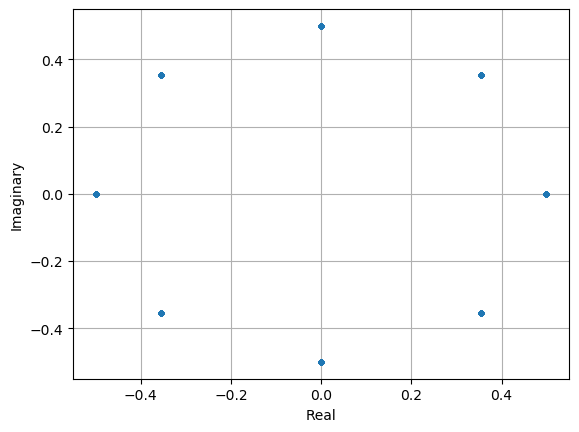

In [31]:
using PyPlot

real_index = 1:2:sample_count
imag_index = 2:2:sample_count

plot(buffer[real_index], buffer[imag_index], ".")
xlabel("Real")
ylabel("Imaginary")
grid("on")